# Питон для анализа данных\НЕДЕЛЯ6/Итоговый проект\
Задание:
    ЧАСТЬ 0    
    Загрузка данных
Перед решением задачи классификации на приведенном наборе данных предлагается нормализовать данные. Датасет доступен для скачивания в формате CSV. В данном случае удобно использовать библиотеку Pandas для загрузки данных.

    ЧАСТЬ 1
    Логистическая регрессия
Для решения задачи классификации предлагается начать с использования логистической регрессии. В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке. Поэтому рекомендуется использовать tensorflow или keras для выполнения этого задания. Используйте стохастический градиентный спуск (stochastic gradient descent) в качестве алгоритма оптимизации.

По своей сути, логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев. В выходном слое содержится количество нейронов, равное количеству классов. В качестве функции активации выходного слоя следует использовать 

softmax.

Обучите логистическую регрессию на тренировочной выборке 
и оцените качество на тестовой выборке используя метрику
accuracy. Постройте график качества модели на валидационной 
выборке от количества эпох. Для этого вы можете использовать 
утилиту tensorboard.

tensorboard в tensorflow
tensorboard в keras
    Часть 2
    Полносвязная нейронная сеть
Далее, попробуйте реализовать полносвязную нейронную сеть с несколькими скрытыми слоями. Обучите модель и посчитайте качество на тестовой выборке. Как оно изменилось в сравнении с логистической регрессией? Как вы можете объяснить этот результат?

Часть 3
      Сверточная нейронная сеть
После этого вам предлагается реализовать сверточную нейронную сеть. В данном случае лучше использовать готовые слои, которые предоставляют keras или tensorflow.

Начните с модели с несколькими сверточными слоями. Так же рекомендуется использовать слои суб-дискретизации, например Max Pooling слои. Они понижают размерность сходных данных и выделяют наиболее важные признаки из данных. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.

Далее, попробуйте увеличить количество слоев в вашей нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируете, как изменилось качество в этом случае.

В заключение, рекомендуется попробовать добавить Batch Normalization слои. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей. Однако, это требует проверки для конкретной модели и конкретного набора данных.

Ответ
В качестве решения приложите архив, содержащий файл решения и все используемые для его работы файлы.Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.

In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np

tf.compat.v1.set_random_seed(0)
np.random.seed(0)

path_to_test_data = 'fashion-mnist_test.csv'
path_to_train_data = 'fashion-mnist_train.csv'

In [2]:
# загрузка данных из csv файлов
def get_data(path_to_data):
    df = pd.read_csv(path_to_data)
    y = np.array(df['label'])
    X = df[df.columns[1:]].to_numpy()
    return X, y

# тренировочная:
X, y = get_data(path_to_train_data)
indices = list(range(len(X)))
np.random.seed(7) #набор случ. последовательностей
np.random.shuffle(indices) # случ. перестановка
i, te_i = indices[10000:], indices[:10000]
X_train, X_valid, y_train, y_valid = X[i], X[te_i], y[i], y[te_i]
# тестовая
X_test, y_test = get_data(path_to_test_data)

# Часть 0. нормализация признаков
y - перевод в бинарный вид, X - перевод в float16 

In [3]:
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train)
y_valid = utils.to_categorical(y_valid)
y_test = utils.to_categorical(y_test)

X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Часть 1. Логистическая регрессия

 https://keras.io/guides/sequential_model/
categorical_crossentropy - функция потерь
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense


In [4]:
# from keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def logistic_regression():
    model = Sequential()
#     model = keras.Sequential()
    model.add(Dense(10, input_shape=(784,), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [13]:
from tensorflow.keras.callbacks import TensorBoard
model = logistic_regression()
m = model.fit(X_train, y_train, epochs=42, 

              validation_data=(X_valid, y_valid),
              verbose=0,
              callbacks=[TensorBoard('./logs/log_regr/')])

#Для запуска в терменале тек. директории tensorboard 
# --logdir ./log/log_regr/

Logistic Regression, score: 0.856


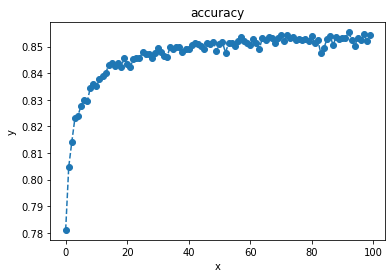

In [14]:
from matplotlib import pyplot as plt

m, score = model.evaluate(X_test, y_test, verbose=0)
print("Logistic Regression, score: {0:.3f}".format(score))

df = pd.read_csv('plot_data.csv')
x, y = df[['Step']].to_numpy(), df[['Value']].to_numpy()
plt.title('accuracy')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, '--o')
# Качество на нетестовой выборке после обучения 42 эпох 
plt.show()

# Часть 2. Полносвязная нейронная сеть

Реализуем полносвязную сверточную сеть с несколькими скрытыми слоями. оптимизптор = adadelta
https://keras.io/api/optimizers/adadelta/


In [20]:
def get_neural_network():
    model = Sequential()
    model.add(Dense(128, input_shape=(784,), activation='softmax'))
    model.add(Dense(32, activation='softmax'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

model = get_neural_network()

In [42]:
# ОБбучение полносвязной НС
from tensorflow.keras.callbacks import ModelCheckpoint
# обучим на тренировочной выборке за 42 эпох
model_checkpoint = ModelCheckpoint('nn.h5', 
                                   save_best_only=True, 
                                   save_weights_only=True,
                                   mode='max',
                                   monitor='val_accuracy')
m = model.fit(X_train, y_train, epochs=42, 
              validation_data=(X_valid, y_valid),
              verbose=0,
              callbacks=[model_checkpoint, TensorBoard('./logs/nn/')])

In [43]:
#веса лучшего состояния
model.load_weights('nn.h5')
m, score = model.evaluate(X_test, y_test, verbose=0)
print("Fully-Connected neural network, score: {0:.3f}".format(score))

Fully-Connected neural network, score: 0.100


# Часть 3. Сверточная нейронная сеть

In [36]:
# Новый оазмер данных для сверточной НС
X_train = X_train.reshape(50000, 28, 28, 1)
X_valid = X_valid.reshape(10000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# добавление готовых слоёв
def get_conv_net():
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='softmax'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='softmax'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax'))
    model.add(Dense(32, activation='softmax'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

model = get_conv_net()

Обучение сверточной НС.

In [38]:
model_checkpoint = ModelCheckpoint('cnn-1.h5', 
                                   save_best_only=True, 
                                   save_weights_only=True,
                                   mode='max',
                                   monitor='val_accuracy')
m = model.fit(X_train, y_train, epochs=15, 
              validation_data=(X_valid, y_valid),
              verbose=0,
              callbacks=[model_checkpoint, TensorBoard('./logs/cnn-1/')])

В результате, качество сверточные нейронной сети на тестовых данных примерно на 2% процента выше полносвязной нейронной сети.

In [44]:
model.load_weights('cnn-1.h5')
_, score = model.evaluate(X_test, y_test, verbose=0)
print("cnn 1, params: %d" % model.count_params())
print("cnn 1, score: {0:.3f}".format(score))

cnn 1, params: 228202
cnn 1, score: 0.100


Попробуем сделать нашу сверточную нейронную сеть немного глубже. Для этого добавим несколько сверточных слоев.

In [45]:
def get_another_conv_net(optimizer='adadelta'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='softmax'))
    model.add(Conv2D(32, (3,3), activation='softmax'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='softmax'))
    model.add(Conv2D(64, (3,3), activation='softmax'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax'))
    model.add(Dense(32, activation='softmax'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = get_another_conv_net()

In [46]:
# Обучение сверточной нейронной сети
model_checkpoint = ModelCheckpoint('cnn-2.h5', 
                                   save_best_only=True, 
                                   save_weights_only=True,
                                   mode='max',
                                   monitor='val_accuracy')
m = model.fit(X_train, y_train, epochs=15, 
              validation_data=(X_valid, y_valid),
              verbose=0,
              callbacks=[model_checkpoint, TensorBoard('./logs/cnn-2/')])

In [48]:
model.load_weights('cnn-2.h5')
_, score = model.evaluate(X_test, y_test, verbose=0)
print("cnn 2, params: %d" % model.count_params())
print("cnn 2, score: {0:.3f}".format(score))

cnn 2, params: 200650
cnn 2, score: 0.100


Добавим Batch Normalization слои в нашу модель после сверточных слоев. Запустим обучение модели.

In [49]:

from tensorflow.keras.layers import BatchNormalization

#Batch Normalization слои в нашу модель после сверточных слоев
def get_conv_net_with_batch_norm(optimizer='adadelta'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='softmax'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), activation='softmax'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='softmax'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='softmax'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax'))
    model.add(Dense(32, activation='softmax'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = get_conv_net_with_batch_norm()

### *Обучение сверточной нейронной сети*

In [50]:
model_checkpoint = ModelCheckpoint('cnn-3.h5', 
                                   save_best_only=True, 
                                   save_weights_only=True,
                                   mode='max',
                                   monitor='val_accuracy')
_ = model.fit(X_train, y_train, epochs=15, 
              validation_data=(X_valid, y_valid),
              verbose=0,
              callbacks=[model_checkpoint, TensorBoard('./logs/cnn-3/')])

качество сверточной нейронной сети на тестовых данных не изменилось

In [51]:
model.load_weights('cnn-3.h5')
_, score = model.evaluate(X_test, y_test, verbose=0)
print("cnn 3, params: %d" % model.count_params())
print("cnn 3, score: {0:.3f}".format(score))

cnn 3, params: 201418
cnn 3, score: 0.100


# Вывод 
на данных выборках отльчие от применения логистической
 регрессии и применении выбранных нейронных сетей дало выигрыш в 12 раз. НС между собой, практически не отличаются в точности обрабртки.